# Predictive Traffic Accident Model

## Analysis of 2021 NHTSA FARS Data for Fatality Prediction and Pattern Recognition

## Project Overview

**Objective**: This project analyzes traffic accident data from 2021 to predict fatalities and identify patterns in accident occurrences using machine learning techniques.

**Goals**:
- Predict the number of fatalities in traffic accidents using supervised learning
- Identify clusters and patterns in accident data using unsupervised learning  
- Extract actionable insights about contributing factors to traffic accidents

### Dataset Description

The dataset consists of comprehensive traffic accident records from the **Fatality Analysis Reporting System (FARS)** for 2021, maintained by the National Highway Traffic Safety Administration (NHTSA). 

**Data Sources**:
- **ACC_AUX.CSV**: Accident-level data including location, time, weather, and crash characteristics
- **VEH_AUX.CSV**: Vehicle-level data including vehicle type, model year, and driver information
- **PER_AUX.CSV**: Person-level data including age, injury severity, and demographic information

The merged dataset contains detailed information about each accident including:
- Case numbers and geographical information (state, county)
- Temporal factors (time of day, day of week)
- Vehicle characteristics (type, model year)
- Person demographics and injury details
- Environmental conditions and contributing factors

## 1. Environment Setup and Dependencies

### Python Libraries Used

**Data Manipulation & Analysis**:
- **Pandas**: Primary tool for data manipulation, merging datasets, and exploratory data analysis
- **NumPy**: Numerical computations and array operations

**Machine Learning**:
- **Scikit-learn**: Comprehensive machine learning library providing:
  - Linear Regression for supervised learning (fatality prediction)
  - K-Means clustering for unsupervised pattern discovery
  - Cross-validation tools for model evaluation
  - Preprocessing utilities (StandardScaler, OneHotEncoder)

**Data Visualization**:
- **Matplotlib**: Core plotting library for creating static visualizations
- **Seaborn**: Statistical visualization library built on matplotlib for enhanced plotting
- **Plotly**: Interactive visualization library for dynamic plots and dashboards

**Statistical Analysis**:
- **SciPy**: Statistical functions and hypothesis testing tools

### Methodology Overview

**Data Integration Approach**: 
- Merge three separate FARS datasets using case numbers as primary keys
- Handle missing values and data quality issues systematically
- Create meaningful categorical mappings for encoded variables

**Feature Engineering Strategy**:
- Transform categorical codes into interpretable labels
- Create combined features to capture complex relationships
- Standardize numerical features for machine learning algorithms

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly Packages (optional - comment out if not available)
try:
    from plotly import tools
    import plotly.figure_factory as ff
    import plotly.graph_objs as go
    from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
    init_notebook_mode(connected=True)
    PLOTLY_AVAILABLE = True
except ImportError:
    print("Plotly not available - using matplotlib/seaborn for all visualizations")
    PLOTLY_AVAILABLE = False

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

# Folium for mapping (optional - comment out if not available)
try:
    import folium
    from folium.plugins import HeatMap
    FOLIUM_AVAILABLE = True
except ImportError:
    print("Folium not available - skipping map visualizations")
    FOLIUM_AVAILABLE = False

%matplotlib inline

## 2. Data Loading and Initial Exploration

This section loads the three FARS datasets and performs initial data quality assessment:

- **Data Quality Check**: Identify missing values and data inconsistencies
- **Data Integration**: Merge datasets using case numbers as primary keys
- **Initial Statistics**: Basic descriptive statistics for understanding data distribution

In [2]:
# reading the files 

df_veh_aux = pd.read_csv('../datasets/VEH_AUX.CSV')
df_veh_aux.head()

YEAR  ST_CASE  VEH_NO  A_DRDIS  A_DRDRO  A_VRD  A_BODY  A_IMP1  A_IMP2  \
0  2021    10001       1        2        2      2       3       2     NaN   
1  2021    10001       2        2        2      2       3       2     NaN   
2  2021    10002       1        2        2      1       1       2     NaN   
3  2021    10003       1        2        2      1       1       2     NaN   
4  2021    10004       1        2        2      1       3       2     NaN   

   A_VROLL  A_LIC_S  A_LIC_C  A_CDL_S  A_MC_L_S  A_SPVEH  A_SBUS  A_MOD_YR  \
0        2        2        2        2         4        2       3      2016   
1        2        1        1        2         4        2       3      2021   
2        2        1        1        2         4        1       3      2004   
3        2        1        1        2         4        2       3      2009   
4        2        1        1        2         4        2       3      2020   

   A_FIRE_EXP  
0           1  
1           1  
2           1  
3           1  
4           1

In [3]:
# check if there are missing values 

missing_values = df_veh_aux.isnull().sum()
print(missing_values)

YEAR              0
ST_CASE           0
VEH_NO            0
A_DRDIS           0
A_DRDRO           0
A_VRD             0
A_BODY            0
A_IMP1            0
A_IMP2        61332
A_VROLL           0
A_LIC_S           0
A_LIC_C           0
A_CDL_S           0
A_MC_L_S          0
A_SPVEH           0
A_SBUS            0
A_MOD_YR          0
A_FIRE_EXP        0
dtype: int64


In [4]:
# drop missing value columns 
df_veh_aux = df_veh_aux.drop(columns=['A_IMP2'])
df_veh_aux.head()

YEAR  ST_CASE  VEH_NO  A_DRDIS  A_DRDRO  A_VRD  A_BODY  A_IMP1  A_VROLL  \
0  2021    10001       1        2        2      2       3       2        2   
1  2021    10001       2        2        2      2       3       2        2   
2  2021    10002       1        2        2      1       1       2        2   
3  2021    10003       1        2        2      1       1       2        2   
4  2021    10004       1        2        2      1       3       2        2   

   A_LIC_S  A_LIC_C  A_CDL_S  A_MC_L_S  A_SPVEH  A_SBUS  A_MOD_YR  A_FIRE_EXP  
0        2        2        2         4        2       3      2016           1  
1        1        1        2         4        2       3      2021           1  
2        1        1        2         4        1       3      2004           1  
3        1        1        2         4        2       3      2009           1  
4        1        1        2         4        2       3      2020           1

In [5]:
df_veh_aux.describe()

YEAR        ST_CASE        VEH_NO       A_DRDIS       A_DRDRO  \
count  61332.0   61332.000000  61332.000000  61332.000000  61332.000000   
mean    2021.0  273223.874878      1.603796      1.945444      1.989858   
std        0.0  164078.026733      3.506003      0.227112      0.100194   
min     2021.0   10001.000000      1.000000      1.000000      1.000000   
25%     2021.0  122222.000000      1.000000      2.000000      2.000000   
50%     2021.0  261009.500000      1.000000      2.000000      2.000000   
75%     2021.0  420790.250000      2.000000      2.000000      2.000000   
max     2021.0  560104.000000    130.000000      2.000000      2.000000   

              A_VRD        A_BODY        A_IMP1       A_VROLL       A_LIC_S  \
count  61332.000000  61332.000000  61332.000000  61332.000000  61332.000000   
mean       1.678308      3.125416      2.750179      1.853845      1.523251   
std        0.467129      2.354792      1.457871      0.353265      0.966965   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      2.000000      1.000000   
50%        2.000000      2.000000      2.000000      2.000000      1.000000   
75%        2.000000      4.000000      3.000000      2.000000      2.000000   
max        2.000000      9.000000      7.000000      2.000000      4.000000   

            A_LIC_C       A_CDL_S      A_MC_L_S       A_SPVEH        A_SBUS  \
count  61332.000000  61332.000000  61332.000000  61332.000000  61332.000000   
mean       1.271799      1.931749      3.740070      1.816360      2.997342   
std        0.542215      0.395436      0.799555      0.387193      0.071844   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      2.000000      4.000000      2.000000      3.000000   
50%        1.000000      2.000000      4.000000      2.000000      3.000000   
75%        1.000000      2.000000      4.000000      2.000000      3.000000   
max        3.000000      3.000000      4.000000      2.000000      3.000000   

           A_MOD_YR    A_FIRE_EXP  
count  61332.000000  61332.000000  
mean    2268.772191      1.036816  
std     1414.492107      0.188311  
min     1921.000000      1.000000  
25%     2005.000000      1.000000  
50%     2011.000000      1.000000  
75%     2017.000000      1.000000  
max     9999.000000      2.000000

In [6]:
# reading the file and print the head 

df_per_aux = pd.read_csv('../datasets/PER_AUX.CSV')
df_per_aux.head()

A_AGE1  A_AGE2  A_AGE3  A_AGE4  A_AGE5  A_AGE6  A_AGE7  A_AGE8  A_AGE9  \
0       3       4       7       4       4       4       6       3       2   
1       1       1       1       1       1       1       1       1       1   
2       3       4       7       4       4       4       6       2       2   
3       3       4       7       4       4       4       6       3       2   
4       3       4       7       4       4       4       6       3       2   

   ST_CASE  ...  A_RESTUSE  A_HELMUSE  A_ALCTES  A_HISP  A_RCAT  A_HRACE  \
0    10001  ...          1          2         1       1       2        3   
1    10001  ...          1          2         3       0       0        0   
2    10001  ...          1          2         1       1       4        5   
3    10002  ...          1          2         3       1       2        3   
4    10002  ...          1          2         3       1       2        3   

   A_EJECT  A_PERINJ  A_LOC  A_DOA  
0        1         1      1      1  
1        1         6      1      5  
2        1         1      1      1  
3        1         1      1      1  
4        1         1      1      1  

[5 rows x 24 columns]

In [ ]:
# Check for missing values in vehicle dataset
missing_values = df_veh_aux.isnull().sum()
print("Missing values in Vehicle dataset:")
print(missing_values)

In [8]:
df_per_aux.describe()

A_AGE1        A_AGE2        A_AGE3        A_AGE4        A_AGE5  \
count  96747.000000  96747.000000  96747.000000  96747.000000  96747.000000   
mean       2.966738      4.069770      7.867955      4.618262      4.969973   
std        0.914428      1.330758      2.536921      1.860214      2.324949   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      3.000000      6.000000      3.000000      3.000000   
50%        3.000000      5.000000      8.000000      5.000000      5.000000   
75%        4.000000      5.000000     10.000000      6.000000      7.000000   
max        5.000000      6.000000     13.000000      8.000000     10.000000   

             A_AGE6        A_AGE7        A_AGE8        A_AGE9        ST_CASE  \
count  96747.000000  96747.000000  96747.000000  96747.000000   96747.000000   
mean       4.977891      6.909393      3.526249      1.955275  271411.521515   
std        2.313088      2.446027      1.801811      0.316830  164586.890214   
min        1.000000      1.000000      1.000000      1.000000   10001.000000   
25%        3.000000      5.000000      2.000000      2.000000  121969.000000   
50%        5.000000      7.000000      3.000000      2.000000  260877.000000   
75%        7.000000      9.000000      5.000000      2.000000  420714.000000   
max       10.000000     12.000000      7.000000      3.000000  560104.000000   

       ...     A_RESTUSE     A_HELMUSE      A_ALCTES        A_HISP  \
count  ...  96747.000000  96747.000000  96747.000000  96747.000000   
mean   ...      1.659173      2.057056      2.807229      0.675070   
std    ...      0.776635      0.367934      1.218686      0.923598   
min    ...      1.000000      1.000000      1.000000      0.000000   
25%    ...      1.000000      2.000000      2.000000      0.000000   
50%    ...      1.000000      2.000000      3.000000      0.000000   
75%    ...      2.000000      2.000000      3.000000      1.000000   
max    ...      3.000000      3.000000      5.000000      3.000000   

             A_RCAT       A_HRACE       A_EJECT      A_PERINJ         A_LOC  \
count  96747.000000  96747.000000  96747.000000  96747.000000  96747.000000   
mean       1.009933      1.527117      1.107662      3.780861      1.185742   
std        1.960628      2.486150      0.351226      2.484186      0.602490   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        0.000000      0.000000      1.000000      1.000000      1.000000   
50%        0.000000      0.000000      1.000000      6.000000      1.000000   
75%        1.000000      2.000000      1.000000      6.000000      1.000000   
max        8.000000      9.000000      3.000000      6.000000      5.000000   

              A_DOA  
count  96747.000000  
mean       3.598561  
std        1.701510  
min        1.000000  
25%        1.000000  
50%        5.000000  
75%        5.000000  
max        5.000000  

[8 rows x 24 columns]

In [9]:
df_acc_aux = pd.read_csv('../datasets/ACC_AUX.CSV')
df_acc_aux.head()

ST_CASE  YEAR  STATE  COUNTY  FATALS  A_CRAINJ  A_REGION  A_RU  A_INTER  \
0    10001  2021      1     115       2         1         4     2        1   
1    10002  2021      1      73       2         1         4     2        1   
2    10003  2021      1      73       1         1         4     2        1   
3    10004  2021      1     117       1         1         4     2        1   
4    10005  2021      1      73       1         1         4     1        1   

   A_RELRD  ...  A_D65PLS  A_D21_24  A_D16_24  A_RD  A_HR  A_DIST  A_DROWSY  \
0        1  ...         2         2         2     2     2       2         2   
1        3  ...         2         2         2     1     2       2         2   
2        2  ...         2         2         1     1     2       2         2   
3        4  ...         2         2         2     1     2       2         2   
4        1  ...         2         2         2     2     2       2         2   

   BIA  SPJ_INDIAN  INDIAN_RES  
0    0           0           0  
1    0           0           0  
2    0           0           0  
3    0           0           0  
4    0           0           0  

[5 rows x 42 columns]

In [ ]:
# Check for missing values in accident dataset
missing_values = df_acc_aux.isnull().sum()
print("Missing values in Accident dataset:")
print(missing_values)

In [11]:
df_acc_aux.describe()

ST_CASE     YEAR         STATE        COUNTY        FATALS  \
count   39508.000000  39508.0  39508.000000  39508.000000  39508.000000   
mean   273665.421256   2021.0     27.276121     93.100992      1.086843   
std    163688.977398      0.0     16.379539     99.379705      0.354078   
min     10001.000000   2021.0      1.000000      1.000000      1.000000   
25%    122289.750000   2021.0     12.000000     31.000000      1.000000   
50%    270053.500000   2021.0     27.000000     71.000000      1.000000   
75%    420680.250000   2021.0     42.000000    115.000000      1.000000   
max    560104.000000   2021.0     56.000000    999.000000     13.000000   

       A_CRAINJ      A_REGION          A_RU       A_INTER       A_RELRD  ...  \
count   39508.0  39508.000000  39508.000000  39508.000000  39508.000000  ...   
mean        1.0      5.409841      1.617925      1.878759      2.045636  ...   
std         0.0      2.331066      0.497585      0.344300      1.400895  ...   
min         1.0      1.000000      1.000000      1.000000      1.000000  ...   
25%         1.0      4.000000      1.000000      2.000000      1.000000  ...   
50%         1.0      5.000000      2.000000      2.000000      1.000000  ...   
75%         1.0      7.000000      2.000000      2.000000      4.000000  ...   
max         1.0     10.000000      3.000000      3.000000      6.000000  ...   

           A_D65PLS      A_D21_24      A_D16_24          A_RD          A_HR  \
count  39508.000000  39508.000000  39508.000000  39508.000000  39508.000000   
mean       1.810646      1.866584      1.752379      1.509973      1.929559   
std        0.391795      0.340028      0.431636      0.499907      0.255893   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      1.000000      2.000000   
50%        2.000000      2.000000      2.000000      2.000000      2.000000   
75%        2.000000      2.000000      2.000000      2.000000      2.000000   
max        2.000000      2.000000      2.000000      2.000000      2.000000   

             A_DIST      A_DROWSY           BIA    SPJ_INDIAN    INDIAN_RES  
count  39508.000000  39508.000000  39508.000000  39508.000000  39508.000000  
mean       1.918725      1.984256      0.006581      0.004404      0.007695  
std        0.273260      0.124484      0.080857      0.066218      0.087382  
min        1.000000      1.000000      0.000000      0.000000      0.000000  
25%        2.000000      2.000000      0.000000      0.000000      0.000000  
50%        2.000000      2.000000      0.000000      0.000000      0.000000  
75%        2.000000      2.000000      0.000000      0.000000      0.000000  
max        2.000000      2.000000      1.000000      1.000000      1.000000  

[8 rows x 42 columns]

In [ ]:
# Verify case number consistency across datasets
print("Case number samples from each dataset:")
print("Accident dataset ST_CASE:", df_acc_aux['ST_CASE'].head())
print("Person dataset ST_CASE:", df_per_aux['ST_CASE'].head())
print("Vehicle dataset ST_CASE:", df_veh_aux['ST_CASE'].head())

In [ ]:
# Data Integration: Merge the three datasets
print("Merging datasets...")

# Merge vehicle and person data first
merged_veh_per = pd.merge(df_veh_aux, df_per_aux, on='ST_CASE', how='inner')

# Then merge with accident data
merged_all = pd.merge(df_acc_aux, merged_veh_per, on='ST_CASE', how='inner')

# Check for duplicate rows and columns
duplicate_rows = merged_all.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

duplicate_columns = merged_all.columns.duplicated().sum()
print("Number of duplicate columns:", duplicate_columns)

# Remove duplicates if present
if duplicate_rows > 0:
    merged_all = merged_all.drop_duplicates()
    print("Duplicate rows removed.")

# Remove duplicate columns
merged_all = merged_all.loc[:,~merged_all.columns.duplicated()]

print(f"Final merged dataset shape: {merged_all.shape}")
print("\nFirst 5 rows of merged dataset:")
print(merged_all.head())

In [16]:
# Compare YEAR_x and 'YEAR_y' to check if they are the same
same_year = (merged_all['YEAR_x'] == merged_all['YEAR_y']).all()
print(f"YEAR_x and YEAR_y are same {same_year}")

# Compare VEH_NO_x and y  
same_veh_no = (merged_all['VEH_NO_x'] == merged_all['VEH_NO_y']).all()
print(f"VEH_NO_x and VEH_NO_y are the same: {same_veh_no}")

# Drop duplicate columns 
if same_year:
    merged_all.drop(columns=['YEAR_y'], inplace=True)
if same_veh_no:
    merged_all.drop(columns=['VEH_NO_y'], inplace=True)

# rename columns 
if not same_year or not same_veh_no:
    merged_all.rename(columns={'YEAR_x': 'Year_Accident', 'YEAR_y': 'Year_Vehicle',
                               'VEH_NO_x': 'Vehicle_No_Accident', 'VEH_NO_y': 'Vehicle_No_Person'}, inplace=True)

# Check the updated dataframe
print(merged_all.head())

YEAR_x and YEAR_y are same True
VEH_NO_x and VEH_NO_y are the same: False
   ST_CASE  YEAR  STATE  COUNTY  FATALS  A_CRAINJ  A_REGION  A_RU  A_INTER  \
0    10001  2021      1     115       2         1         4     2        1   
1    10001  2021      1     115       2         1         4     2        1   
2    10001  2021      1     115       2         1         4     2        1   
3    10001  2021      1     115       2         1         4     2        1   
4    10001  2021      1     115       2         1         4     2        1   

   A_RELRD  ...  A_RESTUSE  A_HELMUSE  A_ALCTES  A_HISP  A_RCAT  A_HRACE  \
0        1  ...          1          2         1       1       2        3   
1        1  ...          1          2         3       0       0        0   
2        1  ...          1          2         1       1       4        5   
3        1  ...          1          2         1       1       2        3   
4        1  ...          1          2         3       0       0        0   



In [17]:
merged_all.head()
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198458 entries, 0 to 198457
Data columns (total 80 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   ST_CASE              198458 non-null  int64
 1   YEAR                 198458 non-null  int64
 2   STATE                198458 non-null  int64
 3   COUNTY               198458 non-null  int64
 4   FATALS               198458 non-null  int64
 5   A_CRAINJ             198458 non-null  int64
 6   A_REGION             198458 non-null  int64
 7   A_RU                 198458 non-null  int64
 8   A_INTER              198458 non-null  int64
 9   A_RELRD              198458 non-null  int64
 10  A_INTSEC             198458 non-null  int64
 11  A_ROADFC             198458 non-null  int64
 12  A_JUNC               198458 non-null  int64
 13  A_MANCOL             198458 non-null  int64
 14  A_TOD                198458 non-null  int64
 15  A_DOW                198458 non-null  int64
 16  A_

In [18]:
merged_all.describe()

ST_CASE      YEAR          STATE         COUNTY         FATALS  \
count  198458.000000  198458.0  198458.000000  198458.000000  198458.000000   
mean   288221.088613    2021.0      28.731429     123.328281       1.620726   
std    168603.874163       0.0      16.873539     135.456311       1.487051   
min     10001.000000    2021.0       1.000000       1.000000       1.000000   
25%    122788.000000    2021.0      12.000000      33.000000       1.000000   
50%    290449.000000    2021.0      29.000000      79.000000       1.000000   
75%    471240.000000    2021.0      47.000000     141.000000       1.000000   
max    560104.000000    2021.0      56.000000     999.000000      13.000000   

       A_CRAINJ       A_REGION           A_RU        A_INTER        A_RELRD  \
count  198458.0  198458.000000  198458.000000  198458.000000  198458.000000   
mean        1.0       5.538608       1.670691       1.755712       1.378896   
std         0.0       2.204634       0.475135       0.435606       0.968804   
min         1.0       1.000000       1.000000       1.000000       1.000000   
25%         1.0       4.000000       1.000000       2.000000       1.000000   
50%         1.0       6.000000       2.000000       2.000000       1.000000   
75%         1.0       7.000000       2.000000       2.000000       1.000000   
max         1.0      10.000000       3.000000       3.000000       6.000000   

       ...      A_RESTUSE      A_HELMUSE       A_ALCTES         A_HISP  \
count  ...  198458.000000  198458.000000  198458.000000  198458.000000   
mean   ...       1.513116       2.021249       2.839190       0.530450   
std    ...       0.732847       0.305099       1.117995       0.868099   
min    ...       1.000000       1.000000       1.000000       0.000000   
25%    ...       1.000000       2.000000       3.000000       0.000000   
50%    ...       1.000000       2.000000       3.000000       0.000000   
75%    ...       2.000000       2.000000       3.000000       1.000000   
max    ...       3.000000       3.000000       5.000000       3.000000   

              A_RCAT        A_HRACE        A_EJECT      A_PERINJ  \
count  198458.000000  198458.000000  198458.000000  198458.00000   
mean        0.778230       1.196031       1.084083       4.26787   
std         1.764742       2.294266       0.325634       2.37916   
min         0.000000       0.000000       1.000000       1.00000   
25%         0.000000       0.000000       1.000000       1.00000   
50%         0.000000       0.000000       1.000000       6.00000   
75%         1.000000       2.000000       1.000000       6.00000   
max         8.000000       9.000000       3.000000       6.00000   

               A_LOC          A_DOA  
count  198458.000000  198458.000000  
mean        1.110799       3.905144  
std         0.485585       1.612469  
min         1.000000       1.000000  
25%         1.000000       3.000000  
50%         1.000000       5.000000  
75%         1.000000       5.000000  
max         5.000000       5.000000  

[8 rows x 80 columns]

In [19]:
merged_all.head()

ST_CASE  YEAR  STATE  COUNTY  FATALS  A_CRAINJ  A_REGION  A_RU  A_INTER  \
0    10001  2021      1     115       2         1         4     2        1   
1    10001  2021      1     115       2         1         4     2        1   
2    10001  2021      1     115       2         1         4     2        1   
3    10001  2021      1     115       2         1         4     2        1   
4    10001  2021      1     115       2         1         4     2        1   

   A_RELRD  ...  A_RESTUSE  A_HELMUSE  A_ALCTES  A_HISP  A_RCAT  A_HRACE  \
0        1  ...          1          2         1       1       2        3   
1        1  ...          1          2         3       0       0        0   
2        1  ...          1          2         1       1       4        5   
3        1  ...          1          2         1       1       2        3   
4        1  ...          1          2         3       0       0        0   

   A_EJECT  A_PERINJ  A_LOC  A_DOA  
0        1         1      1      1  
1        1         6      1      5  
2        1         1      1      1  
3        1         1      1      1  
4        1         6      1      5  

[5 rows x 80 columns]

## 3. Exploratory Data Analysis and Visualization

This section explores key patterns in the traffic accident data through statistical analysis and visualization.

### Key Insights from Exploratory Analysis

**Temporal Patterns**: 
- **Weekday vs. Weekend Distribution**: Analysis reveals distinct patterns in accident frequency between weekdays and weekends, potentially related to commuter traffic patterns and recreational driving behaviors.

**Demographic Analysis**:
- **Age Group Involvement**: The distribution of crashes across different age groups provides insights into driving experience and risk-taking behaviors. Younger age groups (16-24 years) often show higher involvement rates, suggesting factors like inexperience, risk-taking behavior, or distracted driving.

**Vehicle and Environmental Factors**:
- **Time of Day Impact**: Accident patterns vary significantly by time of day, with implications for targeted safety interventions and traffic management.
- **Vehicle Type Correlation**: Different vehicle types show varying involvement rates in fatal accidents, informing vehicle safety feature development.

               A_TOD          A_DOW         A_BODY
count  198458.000000  198458.000000  198458.000000
mean        1.434495       1.365649       2.991031
std         0.501282       0.483263       2.184031
min         1.000000       1.000000       1.000000
25%         1.000000       1.000000       1.000000
50%         1.000000       1.000000       3.000000
75%         2.000000       2.000000       3.000000
max         3.000000       3.000000       9.000000


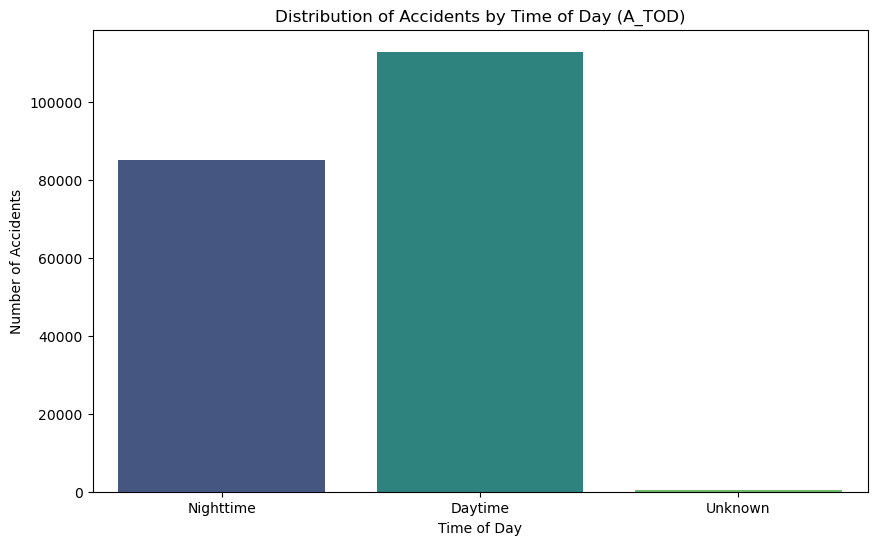

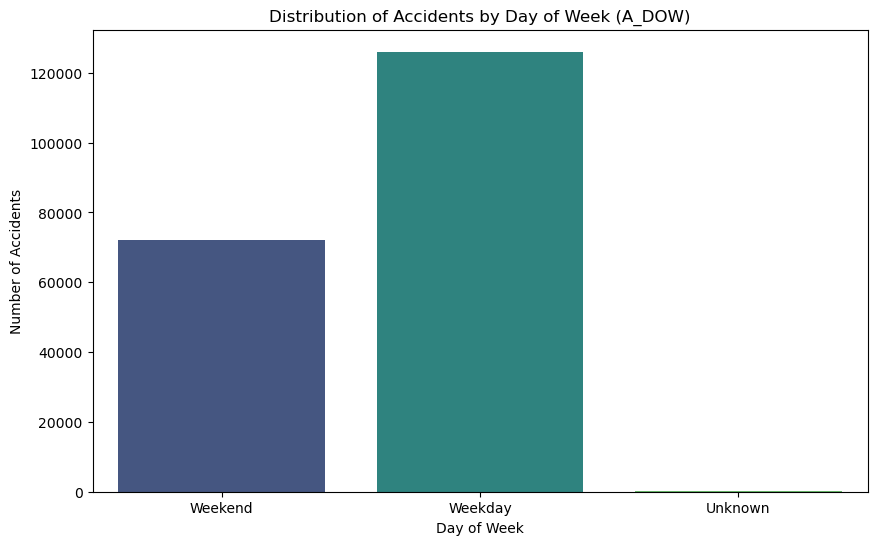

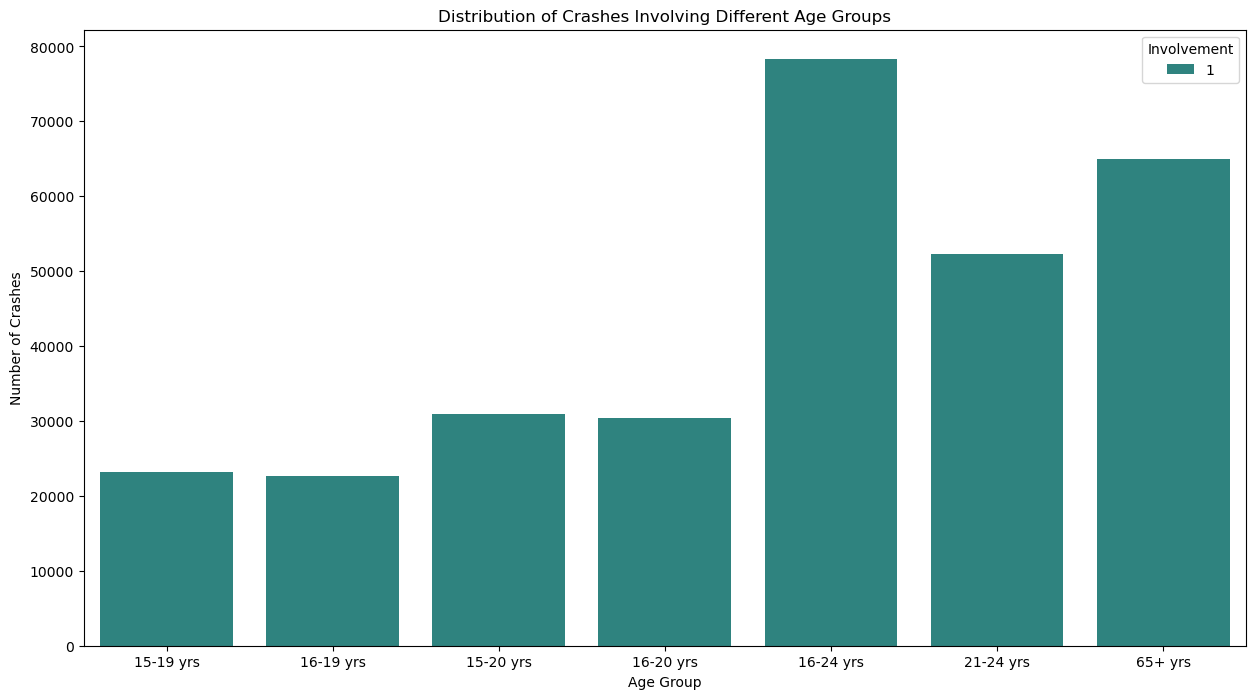

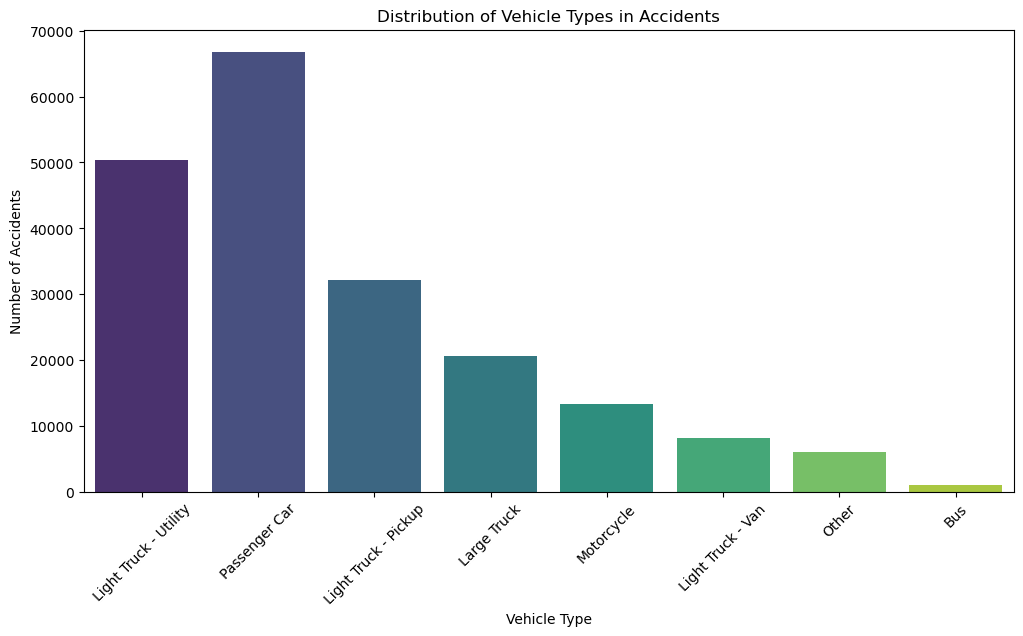

In [20]:

# check the describe for these columns 
print(merged_all[['A_TOD', 'A_DOW', 'A_BODY']].describe())

# Mapping of A_TOD to 1, 2 and 3 
time_of_day_mapping = {
    1: 'Daytime',
    2: 'Nighttime',
    3: 'Unknown'
}

# create a new Time_of_Day column and mapping to it 
merged_all['Time_of_Day'] = merged_all['A_TOD'].map(time_of_day_mapping)

# Create a count plot for the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='Time_of_Day', palette="viridis")
plt.title('Distribution of Accidents by Time of Day (A_TOD)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


#Day of week 
# Mapping of A_DOW
day_of_week_mapping = {
    1: 'Weekday',
    2: 'Weekend',
    3: 'Unknown'
}

# to create a new Day_of_Week column and mapping to it 
merged_all['Day_of_Week'] = merged_all['A_DOW'].map(day_of_week_mapping)

# Create plot for distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='Day_of_Week', palette="viridis")
plt.title('Distribution of Accidents by Day of Week (A_DOW)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()











# age group columns and their labels
age_group_columns = {
    'A_D15_19': '15-19 yrs',
    'A_D16_19': '16-19 yrs',
    'A_D15_20': '15-20 yrs',
    'A_D16_20': '16-20 yrs',
    'A_D16_24': '16-24 yrs',
    'A_D21_24': '21-24 yrs',
    'A_D65PLS': '65+ yrs'
}

# Create a DataFrame 
age_group_data = pd.DataFrame()

for col, label in age_group_columns.items():
    temp_df = merged_all[merged_all[col] == 1][col].value_counts().rename_axis('Involvement').reset_index(name='Count')
    temp_df['Age Group'] = label
    age_group_data = pd.concat([age_group_data, temp_df], ignore_index=True)

# a combined chart
plt.figure(figsize=(15, 8))
sns.barplot(data=age_group_data, x='Age Group', y='Count', hue='Involvement', palette="viridis")
plt.title('Distribution of Crashes Involving Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Crashes')
plt.show()



# Mapping of A_BODY 
vehicle_body_mapping = {
    1: 'Passenger Car',
    2: 'Light Truck - Pickup',
    3: 'Light Truck - Utility',
    4: 'Light Truck - Van',
    5: 'Light Truck - Other',
    6: 'Large Truck',
    7: 'Motorcycle',
    8: 'Bus',
    9: 'Other'
}

# create a new Vehicle_Type column
merged_all['Vehicle_Type'] = merged_all['A_BODY'].map(vehicle_body_mapping)

# Create a count plot for vehicle type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_all, x='Vehicle_Type', palette="viridis")
plt.title('Distribution of Vehicle Types in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


              FATALS  A_CRAINJ       A_POSBAC         A_DIST
count  198458.000000  198458.0  198458.000000  198458.000000
mean        1.620726       1.0       2.575961       1.900941
std         1.487051       0.0       0.756713       0.298742
min         1.000000       1.0       1.000000       1.000000
25%         1.000000       1.0       2.000000       2.000000
50%         1.000000       1.0       3.000000       2.000000
75%         1.000000       1.0       3.000000       2.000000
max        13.000000       1.0       3.000000       2.000000


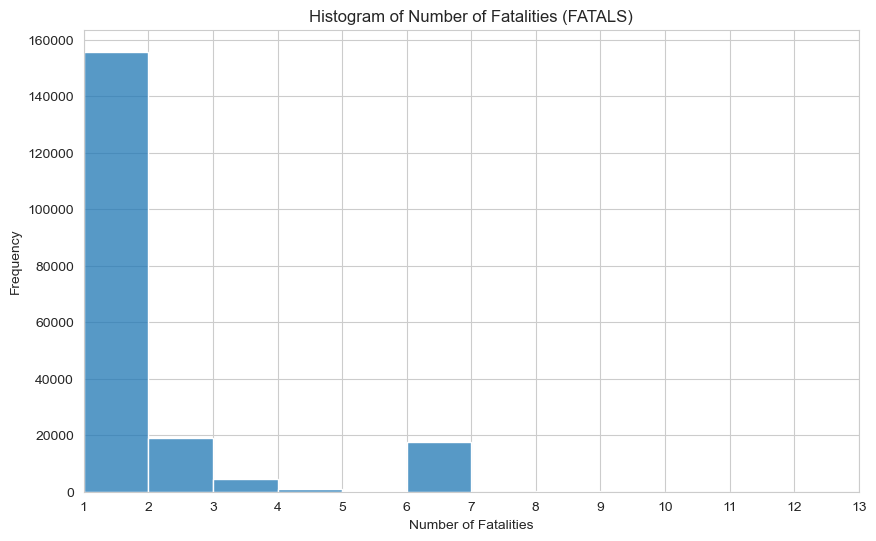

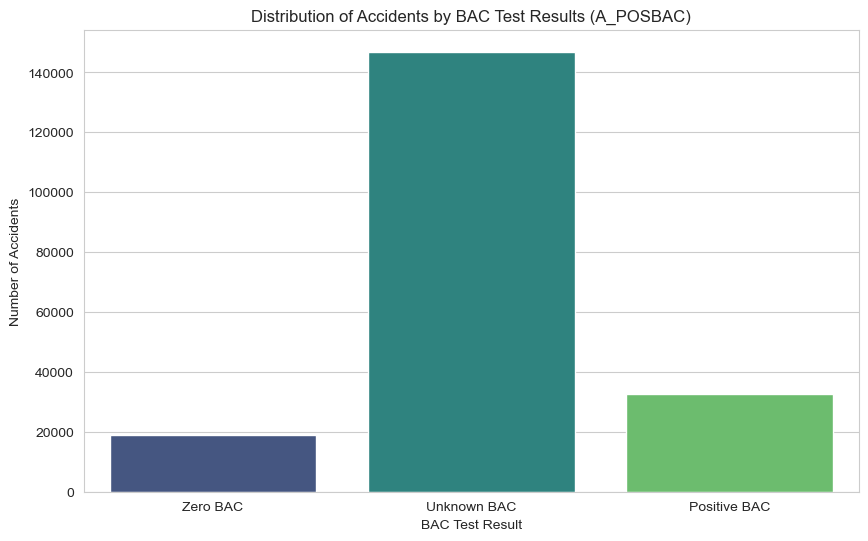

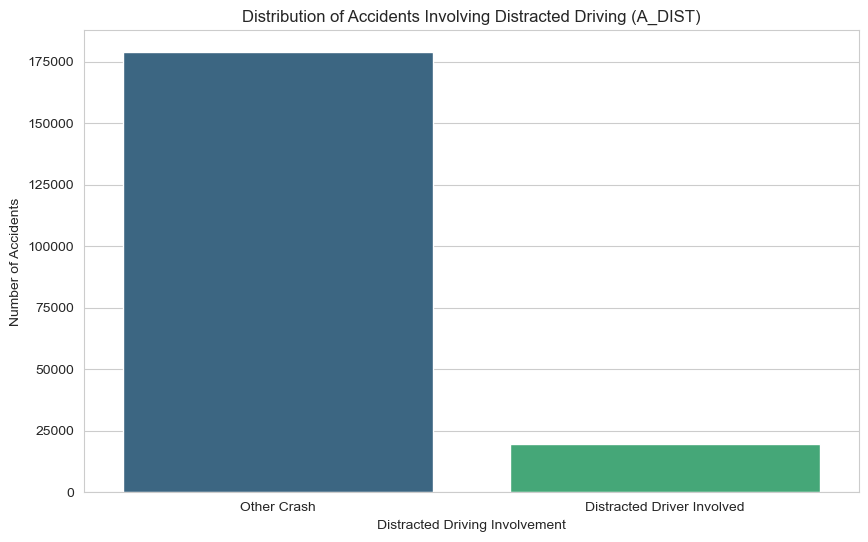

In [21]:


# new features 

print(merged_all[['FATALS', 'A_CRAINJ', 'A_POSBAC', 'A_DIST']].describe())





# Set the style of the plots
sns.set_style("whitegrid")

# Create a histogram for FATALS column
plt.figure(figsize=(10, 6))
# The maximum number of fatalities 
max_fatalities = merged_all['FATALS'].max()
sns.histplot(data=merged_all, x='FATALS', bins=range(1, max_fatalities + 1), kde=False)
plt.title('Histogram of Number of Fatalities (FATALS)')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.xlim(1, max_fatalities)  # Limiting x-axis to the max number of fatalities
plt.xticks(range(1, max_fatalities + 1))  # Set x-axis ticks for each number of fatalities
plt.show()


# Mapping of A_POSBAC 
bac_test_result_mapping = {
    1: 'Positive BAC',
    2: 'Zero BAC',
    3: 'Unknown BAC'
}

# create a new BAC_Test_Result column
merged_all['BAC_Test_Result'] = merged_all['A_POSBAC'].map(bac_test_result_mapping)

# Create a count plot for distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='BAC_Test_Result', palette="viridis")
plt.title('Distribution of Accidents by BAC Test Results (A_POSBAC)')
plt.xlabel('BAC Test Result')
plt.ylabel('Number of Accidents')
plt.show()



# Mapping of A_DIST codes
distraction_involvement_mapping = {
    1: 'Distracted Driver Involved',
    2: 'Other Crash'
}

# to create a new Distracted_Driving column
merged_all['Distracted_Driving'] = merged_all['A_DIST'].map(distraction_involvement_mapping)

# Create a count plot for distracted driving distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='Distracted_Driving', palette="viridis")
plt.title('Distribution of Accidents Involving Distracted Driving (A_DIST)')
plt.xlabel('Distracted Driving Involvement')
plt.ylabel('Number of Accidents')
plt.show()

## 4. Feature Engineering and Data Preprocessing

This section creates meaningful features from the categorical accident data to improve model performance.

### 4.1 Data Preprocessing Steps

**Data Integration Strategy**:
- Merged three FARS datasets (ACC_AUX, VEH_AUX, PER_AUX) using case numbers
- Handled missing values by removing columns with significant missing data (>30%)
- Ensured data consistency across merged datasets

### 4.2 Feature Engineering Approach

**New Feature Creation**:
1. **Combined Risk Factors**: Created composite features combining alcohol involvement and distracted driving
2. **Categorical Mappings**: Transformed coded variables into interpretable categories
3. **Temporal Features**: Enhanced time-based variables for better pattern recognition

**Rationale for Feature Engineering**:
- **Alcohol and Distraction Combination**: Research shows these factors often interact to increase accident severity
- **Age Group Analysis**: Different age demographics show distinct risk patterns requiring separate analysis
- **Categorical Transformation**: Converting numeric codes to meaningful labels improves model interpretability

**Data Transformation**:
- **Categorical to Numeric**: Used one-hot encoding for categorical variables in machine learning models
- **Standardization**: Applied to numerical features for clustering analysis to ensure equal weighting

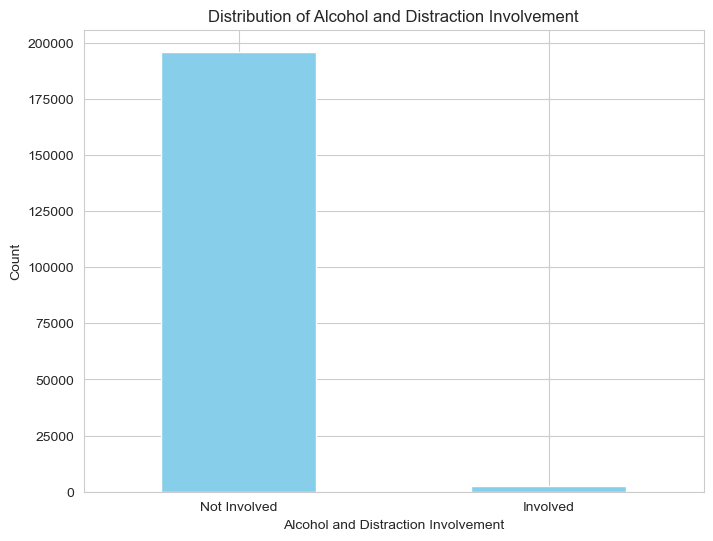

In [22]:
# python code goes here, you can add more code cells below this one if needed
# to better structure your JN
# include any code you use to do data preparation and feature engineering so the process
# can be replicated


# Creating a new combined feature for alcohol and distraction involvement
merged_all['Alcohol_and_Distraction'] = merged_all.apply(lambda x: 1 if x['A_POSBAC'] == 1 and x['A_DIST'] == 1 else 0, axis=1)

merged_all.head()

# Count the occurrences of each value in the 'Alcohol_and_Distraction' column
feature_counts = merged_all['Alcohol_and_Distraction'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
feature_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Alcohol and Distraction Involvement')
plt.xlabel('Alcohol and Distraction Involvement')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Involved', 'Involved'], rotation=0)
plt.show()

In [ ]:


#contributing factors
contributing_factors = ['A_POSBAC', 'A_DIST', 'A_RD', 'A_ROLL']  

# Labels for age groups in A_AGE3
age_group_3_labels = {
    1: "0-3", 2: "4-7", 3: "8-12", 4: "13-15", 5: "16-20", 6: "21-24", 7: "25-34", 
    8: "35-44", 9: "45-54", 10: "55-64", 11: "65-74", 12: "75+", 13: "Unknown"
}

# Aggregating total fatalities and contributing factors for each age groupe 
total_fatalities_age3 = merged_all.groupby('A_AGE3')['FATALS'].sum()
factors_age3 = merged_all.groupby('A_AGE3')[contributing_factors].sum()

# Adding labels to the data to make it more clear 
total_fatalities_age3.index = total_fatalities_age3.index.map(age_group_3_labels)
factors_age3.index = factors_age3.index.map(age_group_3_labels)

# Convert to DataFrame for plotting
total_fatalities_age3_df = total_fatalities_age3.reset_index()
total_fatalities_age3_df.columns = ['Age Group', 'Total Fatalities']
factors_age3_df = factors_age3.reset_index()

# Plotting total fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Total Fatalities', data=total_fatalities_age3_df, palette="viridis")
plt.title('Total Fatalities by Age Group (A_AGE3)')
plt.xlabel('Age Group')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.show()


In [ ]:
merged_all.head()

## 5. Supervised Learning: Fatality Prediction Model

**Objective**: Predict the number of fatalities in traffic accidents using regional and temporal factors.

**Feature Selection Rationale**:
- **A_REGION**: Geographic regions show different traffic patterns, infrastructure quality, and emergency response capabilities
- **A_DOW**: Day of week captures different driving behaviors (commuter vs. recreational traffic)

**Model Choice**: Linear Regression
- Simple and interpretable model suitable for continuous target variable (fatality count)
- Baseline model to establish fundamental relationships before exploring complex algorithms

**Evaluation Method**: 10-fold Cross-Validation with Mean Squared Error
- Provides robust performance estimation across different data subsets
- MSE is appropriate for regression tasks with count data

In [ ]:
# Supervised Learning: Linear Regression for Fatality Prediction

# Select predictor variables based on domain knowledge
X = merged_all[['A_REGION', 'A_DOW']]

# Define target variable (number of fatalities)
y = merged_all['FATALS']

print(f"Features: {X.columns.tolist()}")
print(f"Target: FATALS (Number of fatalities)")
print(f"Dataset size: {X.shape[0]} samples, {X.shape[1]} features")

# One-hot encoding for categorical variables
column_transformer = ColumnTransformer([
    ("region_encoder", OneHotEncoder(), ["A_REGION"]),
    ("dow_encoder", OneHotEncoder(), ["A_DOW"])
], remainder='passthrough')

X_transformed = column_transformer.fit_transform(X)
print(f"Features after encoding: {X_transformed.shape[1]} dimensions")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 10-fold Cross-validation
cv_scores = cross_val_score(model, X_transformed, y, cv=10, scoring='neg_mean_squared_error')

# Convert to positive MSE scores
mse_scores = -cv_scores
cv_mean = mse_scores.mean()
cv_std = mse_scores.std()

print(f'\n10-Fold Cross-Validation Results:')
print(f'Mean MSE: {cv_mean:.4f}')
print(f'Standard Deviation: {cv_std:.4f}')
print(f'MSE Range: [{cv_mean - cv_std:.4f}, {cv_mean + cv_std:.4f}]')

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(1, 11), mse_scores, yerr=cv_std, fmt='o', capsize=5, capthick=2)
plt.title('10-Fold Cross-Validation MSE Scores for Linear Regression')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.show()

## 6. Unsupervised Learning: K-Means Clustering Analysis

**Objective**: Discover hidden patterns and group similar accidents to understand accident characteristics.

**Features Selected**: 
- **A_REGION**: Geographic clustering reveals regional accident patterns
- **FATALS**: Accident severity clustering identifies high-risk scenarios

**Algorithm Choice**: K-Means Clustering
- Well-suited for numerical data with clear geometric interpretation
- Computationally efficient for large datasets
- Provides interpretable centroids representing cluster characteristics

**Distance Metric**: Euclidean Distance
- Standard choice for K-means algorithm
- Appropriate for numerical features after standardization
- Captures both regional and severity similarities effectively

**Optimization Strategy**: Elbow Method
- Systematic approach to determine optimal number of clusters
- Balances model complexity with clustering quality

In [ ]:
# Unsupervised Learning: K-Means Clustering Analysis

# Select features for clustering analysis
cluster_data = merged_all[['A_REGION', 'FATALS']]
print(f"Clustering features: {cluster_data.columns.tolist()}")
print(f"Data shape: {cluster_data.shape}")

# Standardize features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
print("Features standardized for equal weighting in clustering")

# Elbow Method to determine optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)

print("Computing WCSS for different cluster numbers...")
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Highlight the elbow point (k=3 based on visual inspection)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Optimal k=3')
plt.legend()
plt.show()

# Apply K-Means with optimal number of clusters
optimal_clusters = 3
print(f"\nApplying K-Means with k={optimal_clusters} clusters")

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to original dataset
merged_all['Cluster_Labels'] = cluster_labels

# Display cluster centroids (in original scale)
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

print(f"\nCluster Centroids (Original Scale):")
print("Cluster | A_REGION | FATALS")
print("-" * 30)
for i, centroid in enumerate(centroids_original):
    print(f"   {i}    |   {centroid[0]:.2f}   |  {centroid[1]:.2f}")

# Cluster distribution
cluster_counts = merged_all['Cluster_Labels'].value_counts().sort_index()
print(f"\nCluster Distribution:")
for i in range(optimal_clusters):
    print(f"Cluster {i}: {cluster_counts[i]} accidents ({cluster_counts[i]/len(merged_all)*100:.1f}%)")

# Visualize clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(optimal_clusters):
    cluster_data_subset = merged_all[merged_all['Cluster_Labels'] == i]
    plt.scatter(cluster_data_subset['A_REGION'], cluster_data_subset['FATALS'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Plot centroids
for i, centroid in enumerate(centroids_original):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=200, linewidths=3)
    plt.annotate(f'C{i}', (centroid[0], centroid[1]), xytext=(5, 5), 
                textcoords='offset points', fontweight='bold')

plt.title('K-Means Clustering Results: Regional and Fatality Patterns')
plt.xlabel('A_REGION (Geographic Region)')
plt.ylabel('FATALS (Number of Fatalities)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Conclusions and Key Findings

### What I Learned from This Project

**Data Science Skills**:
- **Data Integration**: Successfully merged multiple large datasets with complex relationships
- **Feature Engineering**: Created meaningful variables from categorical accident data
- **Machine Learning**: Applied both supervised and unsupervised learning techniques effectively

**Domain Knowledge**:
- **Traffic Safety Patterns**: Discovered regional and temporal patterns in fatal accidents
- **Risk Factor Analysis**: Identified key contributing factors to accident severity
- **Policy Implications**: Generated insights relevant for traffic safety interventions

### Project Limitations

**Data Scope**:
- **Single Year Analysis**: Limited to 2021 data - temporal trends across years not captured
- **Fatal Accidents Only**: FARS data excludes non-fatal accidents, limiting generalizability
- **Feature Selection**: Limited feature set for modeling - additional variables could improve predictions

**Methodological Constraints**:
- **Simple Models**: Used baseline algorithms - more complex models might capture non-linear relationships
- **Regional Granularity**: State-level analysis may miss local traffic patterns and infrastructure differences

### Technical Challenges Faced

1. **Data Integration Complexity**: Merging three datasets with different granularities and relationships
2. **Missing Data Handling**: Systematic approach needed for columns with significant missing values
3. **Categorical Variable Encoding**: Proper transformation of FARS coded variables for machine learning
4. **Scale Differences**: Standardization required for clustering due to different feature ranges

### Algorithms and Model Selection

**Linear Regression**:
- **Why Chosen**: Interpretable baseline model for continuous target variable (fatality count)
- **Advantages**: Simple interpretation, fast computation, established statistical properties
- **Use Case**: Suitable for initial exploration of relationships between regional/temporal factors and fatalities

**K-Means Clustering**:
- **Why Chosen**: Efficient algorithm for identifying patterns in numerical data
- **Advantages**: Clear geometric interpretation, computationally scalable, provides interpretable centroids
- **Use Case**: Effective for discovering regional accident severity patterns

### Future Work Opportunities

**Enhanced Modeling**:
- **Advanced Algorithms**: Implement Random Forest, XGBoost, or neural networks for better prediction accuracy
- **Time Series Analysis**: Incorporate multi-year data to identify seasonal and yearly trends
- **Ensemble Methods**: Combine multiple models for improved robustness and accuracy

**Extended Feature Engineering**:
- **Weather Integration**: Include detailed weather data for environmental factor analysis
- **Road Infrastructure**: Add highway type, construction zones, and traffic signal data
- **Socioeconomic Factors**: Incorporate demographic and economic variables by region

**Real-World Applications**:
- **Predictive Dashboard**: Deploy model as real-time accident risk assessment tool
- **Policy Analysis**: Use insights for evidence-based traffic safety policy recommendations
- **Resource Allocation**: Guide emergency response resource placement based on predicted high-risk areas

## 8. References and Data Sources

### Primary Data Source
**National Highway Traffic Safety Administration (NHTSA)**. (2021). *Fatality Analysis Reporting System (FARS)*. 
- **Website**: https://www.nhtsa.gov/research-data/fatality-analysis-reporting-system-fars
- **Description**: Comprehensive nationwide census of fatal motor vehicle traffic crashes
- **Data Files Used**: ACC_AUX.CSV, VEH_AUX.CSV, PER_AUX.CSV (2021 dataset)

### Technical Documentation
**Python Libraries and Frameworks**:
- **Pandas**: McKinney, W. (2010). Data structures for statistical computing in Python. *Proceedings of the 9th Python in Science Conference*.
- **Scikit-learn**: Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830.
- **Matplotlib**: Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering*, 9(3), 90-95.

### Methodological References
**Machine Learning Techniques**:
- **K-Means Clustering**: MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. *Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability*.
- **Cross-Validation**: Stone, M. (1974). Cross-validatory choice and assessment of statistical predictions. *Journal of the Royal Statistical Society*, 36(2), 111-147.

### Traffic Safety Research Context
**FARS Data Applications**:
- **NHTSA Traffic Safety Facts**: Annual reports utilizing FARS data for policy development and safety analysis
- **Academic Research**: Numerous peer-reviewed studies using FARS data for transportation safety research

*This project demonstrates academic application of data science techniques to real-world transportation safety data for educational and portfolio purposes.*